In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

df1 = pd.read_csv('honduras_factors.csv')
df1= df1.replace(0,np.NaN)
df1 = df1.replace('', np.NaN)

lastCol= len(list(df1))
lastRow = len(df1.index)-5  #the last row we want to take data (to remove world bank credits)

#dont change the order of code below!
df1.drop(df1.index[lastRow:], inplace=True)
df1.drop(list(df1)[lastCol-2:lastCol],axis=1, inplace=True)
df1.drop('Country Name', axis=1, inplace=True)
df1.drop(list(df1)[1:22],axis=1, inplace=True)  #delete select columns (years) from input file
df1.dropna(axis=0, inplace=True)

df1.set_index('Series Name',inplace=True) #choose 'Series Name' to be the new index
dfT = df1.T
dfT = dfT.reset_index()   #reset index - required for OLS format

#dfT.to_csv('transposedData.csv', encoding='utf-8')
lenCol= len(list(dfT))  #to find number of columns of pruned table

X = dfT[list(dfT)[1:lenCol]]  #take all columns for analysis except for 1st column(year) 
X = sm.add_constant(X)

df2 = pd.read_csv('honduras_1990-2016.csv')
y = df2['Honduras']
#X.to_csv('OutputData.csv', encoding='utf-8')
#print(lenCol)


In [9]:
def findFeatures(maxFeatures, y, x):    
    subset = x[list(x)[1:lenCol]]    #list is pandas builtin function to get header list
    while(len(subset.columns) > maxFeatures):
        subsetNames = []
        end = len(subset.columns) - 20
        if(len(subset.columns) < 20):
            end = len(subset.columns)
        for i in range(0, end, 20):
            subsetNames.extend(backward_select(subset[list(subset)[i:i+20]], y,  list(subset[list(subset)[i:i+20]].columns.values), maxFeatures))
        subset = x[subsetNames]
    return subset


def backward_select(df, y, remaining_features, maxFeatures):
    SSE = 0
    while True:
        X = df[remaining_features]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        yhat = model.predict(X)
        SSE=((y-yhat)**2).sum()
        maxVal = 0
        index = 0 
        a = model.pvalues
        for val in range(0,len(a)):
            if a[val] > maxVal:
                maxVal = a[val]
                index = val
        if len(remaining_features) > maxFeatures:
            #print(remaining_features[index-1],", SSE:",SSE)
            del remaining_features[index-1]
        else:
            break
    return list(remaining_features)



465178.74825164175 -12317.586615924287x  +5601.863826617971x  +0.001018657354688822x  -2152.479380817702x  +0.0001367218352213469x  -0.00015154805980455567x  -23.844547552334536x  +2.5988929872810225x  +1708.2224449610603x  -0.0004691848504016034x  +2258.2406784267323x 


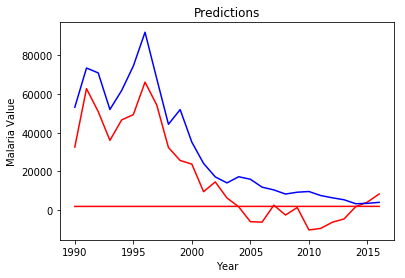

In [10]:
#Use findfeatures function with any number between 1-19
df2 = pd.read_csv('honduras_1990-2016.csv')
#dfWeather = pd.read_csv('../HondurasWeather1990-2016.csv')
y = df2['Honduras']
dfSubset = findFeatures(11, y, dfT)
X = dfSubset
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# print(model.summary())
# print(model.params)
# print(model.pvalues)
predictionArray = []
predictionEq = str(model.params[0])
for j in range(1, len(model.params)):
    if(model.params[j] < 0):
        predictionEq +=  ' '+str(model.params[j])+'x '
    else:
        predictionEq += ' +'+str(model.params[j])+'x '

for y in range(0, len(y)):
    prediction = model.params[0]
    for i in range(1, len(dfSubset.columns)):
        prediction += model.params[i]* dfSubset[list(dfSubset)[i-1]][y]
    predictionArray.append((1990+y,prediction))

print(predictionEq)
plt.plot(range(1990,2017),predictionArray, color='r')
plt.plot(range(1990,2017),df2['Honduras'], color='b')
plt.title("Predictions")
plt.xlabel('Year')
plt.ylabel('Malaria Value')
plt.show()

In [ ]:
df2 = pd.read_csv('honduras_1990-2016.csv')
#dfWeather = pd.read_csv('../HondurasWeather1990-2016.csv')
y = df2['Honduras']
dfSubset = findFeatures(11, y)
X = dfSubset
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
yhat = model.predict(X)
SSEFull=((y-yhat)**2).sum()

features=features=["earthquake","taunts","pressure","precipitation","temperature"]
y = dfSharks['sharknado hazard']
X = dfSharks[features]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
yhat = model.predict(X)
SSERed=((y-yhat)**2).sum()


F = ((SSERed-SSEFull)/(14-5))/(SSEFull/(len(dfSharks)-14-1)) 
print(F)
print(stats.f.ppf(1-0.01, 9,(len(dfSharks)-14-1) ))

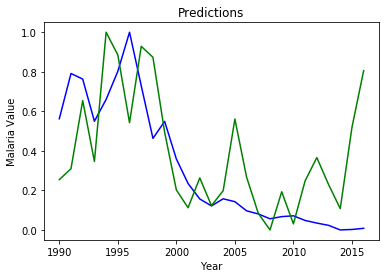

In [38]:
dfWeather = pd.read_csv('../HondurasWeather1990-2016.csv')
df2 = pd.read_csv('honduras_1990-2016.csv')

df = dfWeather['value']
df2 = df2['Honduras']
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df2=(df2-df2.min())/(df2.max()-df2.min())
plt.plot(range(1990,2017),normalized_df2, color='b')
plt.plot(range(1990,2017),normalized_df, color='g')
plt.title("Predictions")
plt.xlabel('Year')
plt.ylabel('Malaria Value')
plt.show()

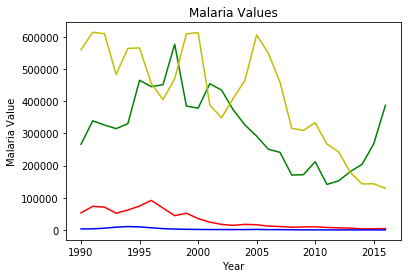

In [44]:
df2 = pd.read_csv('honduras_1990-2017.csv')
df2 = df2['Datum'] 
plt.plot(range(1990,2017),df2, color='r')

df3 = pd.read_csv('Andean Area_1990-2017.csv')
df3 = df3['Datum'] 
plt.plot(range(1990,2017),df3, color='g')

df4 = pd.read_csv('Belize_1990-2017.csv')
df4 = df4['Datum'] 
plt.plot(range(1990,2017),df4, color='b')


df5 = pd.read_csv('Brazil_1990-2017.csv')
df5 = df5['Datum'] 
plt.plot(range(1990,2017),df5, color='y')



plt.title("Malaria Values")
plt.xlabel('Year')
plt.ylabel('Malaria Value')
plt.show()